In [14]:
import librosa
import numpy as np

In [6]:
filename = "./voice.wav"

y, sr = librosa.load(filename)

In [42]:
!ffprobe -i voice.wav

ffprobe version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2007-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --en

In [41]:
16000 * 16

256000

In [38]:
!file "./voice.wav"

/bin/sh: 1: file: not found


In [26]:
print(y)
print(y.shape)
print(sr)

[-2.6416773e-04 -8.7711713e-05  7.4029871e-05 ... -4.7190872e-04
 -7.1896898e-04  0.0000000e+00]
(67451,)
22050


In [10]:
import IPython.display as ipd
ipd.Audio(filename) # load a local WAV file

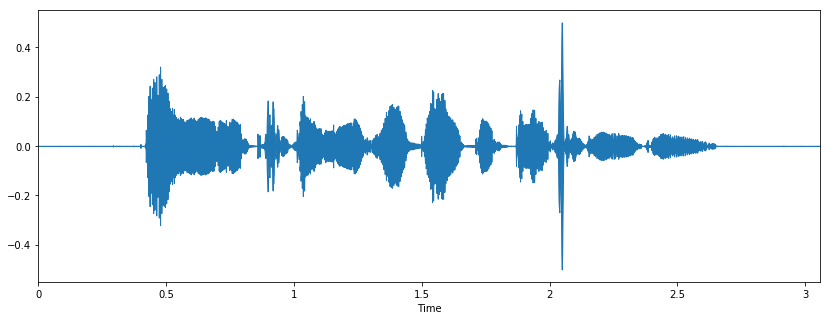

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

In [12]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

ipd.Audio(x, rate=sr) # load a NumPy array

In [33]:
D = librosa.stft(y)
print(D)

D_mag = np.abs(D)
print(D_mag)
print(D_mag.shape)

magnitude, phase = librosa.magphase(D)

print(magnitude)
print(magnitude.shape)

print(magnitude-D_mag)


[[-2.0271669e-01+0.0000000e+00j -2.2335482e-01+0.0000000e+00j
  -2.0624745e-01+0.0000000e+00j ... -2.0536214e-01+0.0000000e+00j
  -1.8242790e-01+0.0000000e+00j -2.3943342e-01+0.0000000e+00j]
 [ 9.1300845e-02-2.0328791e-20j  1.1643804e-01-2.2544067e-02j
   1.2114920e-01+3.9568920e-02j ...  1.4364478e-01+1.0614019e-02j
   5.6337316e-02+1.5565794e-02j  1.2117173e-01-7.1593568e-02j]
 [-2.6720785e-02+5.0802031e-19j  6.8106810e-03+5.4051723e-02j
   2.8513984e-03-3.2043349e-02j ... -6.4515918e-02-3.1750415e-02j
   3.9262515e-02-1.0073975e-03j  1.2647596e-02+5.2239187e-02j]
 ...
 [ 3.0625091e-05-4.7234372e-20j -1.5313077e-05+3.8300638e-09j
   1.5027125e-10-3.1777798e-09j ...  3.2753153e-10+1.1841784e-09j
   2.4383682e-05-2.6246200e-05j -4.0960076e-04+4.4092195e-04j]
 [-3.0623272e-05-2.2022857e-18j -1.1120203e-09+1.5309830e-05j
  -1.5343739e-09+2.1170277e-09j ...  1.4012157e-09-6.2863231e-10j
   3.2840220e-05-1.4316929e-05j -2.4049824e-04-5.5167143e-04j]
 [ 3.0622934e-05+0.0000000e+00j  1.53131

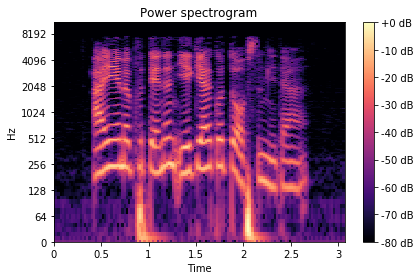

In [34]:
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(magnitude,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

(128, 132)


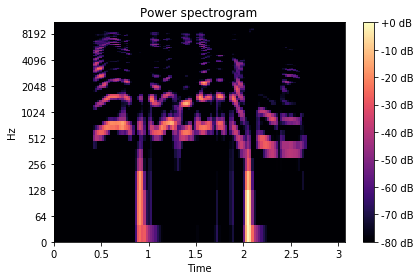

In [35]:
mel_s = librosa.feature.melspectrogram(y=y, sr=sr)
print(mel_s.shape)

import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(mel_s,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [36]:
67451 / 512

131.740234375

(40, 132)


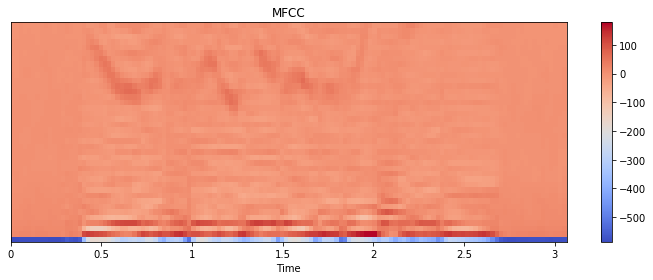

In [37]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

print(mfccs.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

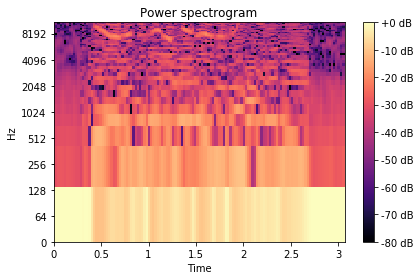

In [31]:
import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(mfccs,
                                                  ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()